In [6]:
import sys
import os
import importlib
from pathlib import Path
import pandas as pd


In [8]:
# Add the parent directory of the current script to the Python path
current_dir = current_dir = os.getcwd()
ml4qs_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
filedir = os.path.abspath(os.path.join(ml4qs_dir, 'measurement-data'))
PythonPath= os.path.abspath(os.path.join(ml4qs_dir, 'Python3Code'))
if filedir not in sys.path:
    sys.path.append(filedir)
if PythonPath not in sys.path:
    sys.path.append(PythonPath)
if ml4qs_dir not in sys.path:
    sys.path.append(ml4qs_dir)


#make sure directories are set properly such that you can import CreateDataset as a package
print(f"Current directory: {filedir}")
print(f"ML4QS directory: {PythonPath}")
print(f"sys.path: {sys.path}")


Current directory: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\measurement-data
ML4QS directory: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\Python3Code
sys.path: ['c:\\Users\\chris\\miniconda3\\envs\\myenv\\python38.zip', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\DLLs', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib', 'c:\\Users\\chris\\miniconda3\\envs\\myenv', '', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\win32', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\chris\\miniconda3\\envs\\myenv\\lib\\site-packages\\Pythonwin', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60\\measurement-data', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60\\Python3Code', 'c:\\Users\\chris\\OneDrive\\Documenten\\GitHub\\ML4QS-group60']


In [90]:
# import sys
# import os

# #clean paths in directory 
# def clean_sys_path():
#     # Create a set to track seen directories
#     seen = set()
#     cleaned_path = []

#     for path in sys.path:
#         # Check if the path is a valid directory
#         if os.path.isdir(path):
#             # Only add the path if it hasn't been seen before
#             if path not in seen:
#                 seen.add(path)
#                 cleaned_path.append(path)
#         else:
#             print(f"Removing faulty path: {path}")

#     # Update sys.path with the cleaned list
#     sys.path = cleaned_path

#     # Print the cleaned sys.path
#     print("Cleaned sys.path:")
#     for path in sys.path:
#         print(path)

# # Clean sys.path
# clean_sys_path()


Removing faulty path: c:\Users\chris\miniconda3\envs\myenv\python38.zip
Removing faulty path: 
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\measurement data
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\measurement data\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\Python3Code
Removing faulty path: c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60\measurement data
Cleaned sys.path:
c:\Users\chris\miniconda3\envs\myenv\DLLs
c:\Users\chris\miniconda3\envs\myenv\lib
c:\Users\chris\miniconda3\envs\myenv
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\win32
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\win32\lib
c:\Users\chris\miniconda3\envs\myenv\lib\site-packages\Pythonwin
c:\Users\chris\OneDrive\Documenten\GitHub\ML4QS-group60
c:\Users\chris\OneDrive\Documenten\GitHub\ML

In [ ]:
import pandas as pd

# Define the CSV file path
for name in ['aron', 'chris', 'tunde']:
    for i in range(1, 4):
        file_path_arm = Path(f'measurement-data/unprocessed-Psy/Arm_{name}_{i}/meta/time.csv')
        file_path_been = Path(f'measurement-data/unprocessed-Psy/Been_{name}_{i}/meta/time.csv')
        # Read the CSV file into a pandas DataFrame
        starttimes_a = pd.read_csv(ml4qs_dir / file_path_arm, skipinitialspace=True)
        starttimes_b = pd.read_csv(ml4qs_dir / file_path_been, skipinitialspace=True)
        # Convert the 'system time text' column to datetime objects

        indexa = len(starttimes_a['system time text'])
        device_times_a = pd.to_datetime(starttimes_a['system time text'])
        experiment_times_a = starttimes_a['experiment time'][indexa - 2]
        device_times_a = device_times_a.dt.tz_localize(None)
        print(device_times_a)

    
        indexb = len(starttimes_b['system time text'])
        device_times_b = pd.to_datetime(starttimes_b['system time text'])
        experiment_times_b = starttimes_b['experiment time'][indexb - 2]
        device_times_b = device_times_b.dt.tz_localize(None)
        print(device_times_b)

        hoeveelheida = 0
        hoeveelheidb = 0

        if indexa > 2:
            hoeveelheida += experiment_times_a
        if indexb > 2: 
            hoeveelheidb += experiment_times_b

        print(f'naam: {name}, ronde {i}, verchil been {hoeveelheidb}, verschil arm {hoeveelheida}')
        if device_times_a[indexa -2] > device_times_b[indexb -2]:
            hoeveelheidb += (device_times_a[indexa -2] - device_times_b[indexb -2]).total_seconds()
        else: 
            hoeveelheida += (device_times_b[indexb -2] - device_times_a[indexa -2]).total_seconds()

        print(f'naam: {name}, ronde {i}, verchil been {hoeveelheidb}, verschil arm {hoeveelheida}')

        for meet in ['Accelerometer', 'Gyroscope']:
            file_path_a = Path(f'measurement-data/unprocessed-Psy/Arm_{name}_{i}/{meet}.csv')
            file_path_b = Path(f'measurement-data/unprocessed-Psy/Been_{name}_{i}/{meet}.csv')
            measurements_a = pd.read_csv(ml4qs_dir / file_path_a, skipinitialspace=True)
            measurements_b = pd.read_csv(ml4qs_dir / file_path_b, skipinitialspace=True)

            filtered_arm = measurements_a[(measurements_a['Time (s)'] >= hoeveelheida) & (measurements_a['Time (s)'] < 300.0 + hoeveelheida)]
            filtered_been = measurements_b[(measurements_b['Time (s)'] >= hoeveelheidb) & (measurements_b['Time (s)'] < 300.0 + hoeveelheidb)]

            filtered_arm['Time (s)'] = filtered_arm['Time (s)'] - hoeveelheida
            filtered_been['Time (s)'] = filtered_been['Time (s)'] - hoeveelheidb

            filtered_arm = filtered_arm.reset_index(drop=True)
            filtered_been = filtered_been.reset_index(drop=True)
        

       
            # Print the filtered DataFrame to verify
            print(filtered_arm.head)
            print(filtered_been.head)

            outputpath_a = Path(f'measurement-data/start-times/{name}/Arm/{meet}_{i}.csv')
            outputpath_b = Path(f'measurement-data/start-times/{name}/Been/{meet}_{i}.csv')

            output_file_path_a = ml4qs_dir / outputpath_a
            filtered_arm.to_csv(output_file_path_a, index=False)

            output_file_path_b = ml4qs_dir / outputpath_b
            filtered_arm.to_csv(output_file_path_b, index=False)


processing the heartbeat data, such that the time range is correctly measured. The arm measurements are used as start time 


In [57]:
import pandas as pd

# Define the CSV file path
for name in ['aron', 'chris', 'tunde']:
    for i in range(1, 4):
        file_path = Path(f'measurement-data/unprocessed-Psy/Arm_{name}_{i}/meta/time.csv')
        # Read the CSV file into a pandas DataFrame
        starttimes = pd.read_csv(ml4qs_dir / file_path, skipinitialspace=True)
        # Convert the 'system time text' column to datetime objects
        device_times = pd.to_datetime(starttimes['system time text'])
        device_times = device_times.dt.tz_localize(None)
        device_times = device_times.dt.round('S')
        print(device_times[0])


        file_path_HR = Path(f'measurement-data/Heartrates/{name}_{i}-HR.csv')
        Aron1_HR = pd.read_csv(ml4qs_dir / file_path_HR, skipinitialspace=True)
        Aron1_HR_Times = pd.read_csv(ml4qs_dir / file_path_HR, skiprows=2)
        #print(Aron1_HR_Times)
        start_row = Aron1_HR.iloc[0]
        start_time_HR = start_row['Start time']
        date_HR = start_row['Date']

        start_datetime_HR = pd.to_datetime(f"{date_HR} {start_time_HR}")
        print(f"Start Time HR: {start_datetime_HR}")

        diff = (device_times[0] - start_datetime_HR).total_seconds()

        print(f'{diff}')

        Aron1_HR_Times['Time'] = pd.to_timedelta(Aron1_HR_Times['Time'], unit='s')
        Aron1_HR_Times['Time'] = start_datetime_HR + Aron1_HR_Times['Time']

        # Filter out the rows in the HR data based on the calculated difference
        filtered_HR = Aron1_HR_Times[(Aron1_HR_Times['Time'] >= (start_datetime_HR + pd.to_timedelta(diff, unit='s'))) & (Aron1_HR_Times['Time'] <= (start_datetime_HR + pd.to_timedelta(diff, unit='s')+ pd.to_timedelta(300, unit='s')))]

        filtered_HR = filtered_HR[['Time', 'HR (bpm)']].reset_index(drop=True)
        filtered_HR['Time'] = pd.to_timedelta(filtered_HR.index, unit='s')
        filtered_HR['Time'] = filtered_HR['Time'].apply(lambda x: str(x).split('days')[-1].strip())
        # Drop the 'Time' column if it's not needed anymore
        #filtered_HR = filtered_HR.drop(columns=['Time'])

        # Print the filtered DataFrame to verify
        print(filtered_HR)

        outputpath = Path(f'measurement-data/filtered/{name}_{i}-HR.csv')
        output_file_path = ml4qs_dir / outputpath
        #filtered_HR.to_csv(output_file_path, index=False)

2024-06-06 13:58:39
Start Time HR: 2024-06-06 13:57:39
60.0
         Time  HR (bpm)
0    00:00:00        71
1    00:00:01        71
2    00:00:02        72
3    00:00:03        82
4    00:00:04        89
..        ...       ...
296  00:04:56       161
297  00:04:57       162
298  00:04:58       162
299  00:04:59       162
300  00:05:00       163

[301 rows x 2 columns]
2024-06-06 14:07:35
Start Time HR: 2024-06-06 14:04:46
169.0
         Time  HR (bpm)
0    00:00:00       113
1    00:00:01       113
2    00:00:02       112
3    00:00:03       112
4    00:00:04       108
..        ...       ...
296  00:04:56       175
297  00:04:57       175
298  00:04:58       175
299  00:04:59       175
300  00:05:00       176

[301 rows x 2 columns]
2024-06-06 14:15:16
Start Time HR: 2024-06-06 14:14:05
71.0
         Time  HR (bpm)
0    00:00:00     124.0
1    00:00:01     124.0
2    00:00:02     123.0
3    00:00:03     115.0
4    00:00:04     113.0
..        ...       ...
296  00:04:56     188.0
297

making the tables, processing data with right granularity etc. In case start-time and end-times are changed, make sure to alter createDataset.py accordingly



In [81]:
from lib.Chapter2 import CreateDataset
importlib.reload(CreateDataset)
# Otherwise changes in CreateDatasetClass are not automatically reloaded. 
from lib.Chapter2.CreateDataset import CreateDatasetClass 

date = '2024-01-01'
granularity = 100  # in milliseconds (0.1 second)
start_time = date + ' 00:00:00'
end_time = date + ' 00:05:00'
cols = ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)', 'X (m/s^2)','Y (m/s^2)','Z (m/s^2)']


dataset_creators_a = []

for name in ['aron', 'chris', 'tunde'] : 
    for i in range(1,4): 
        dataset_creators_a.append(CreateDatasetClass(Path(filedir), granularity))
        prefix = f'{name}_Arm_{i}_'
        dataset_creators_a[i-1].create_dataset(start_time, end_time, cols, prefix)
        for part in ['Arm', 'Been']:
            
            prefix = f'{name}_{part}_{i}_'
            relevcols = ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)']
            file = f'start-times/{name}/{part}/Gyroscope_{i}.csv'
            timestamp_col = 'Time (s)'
            aggregation='avg'
            dataset_creators_a[i-1].add_numerical_dataset(file, timestamp_col, relevcols, date, aggregation, prefix)

            relevcols = ['X (m/s^2)','Y (m/s^2)','Z (m/s^2)']
            file = f'start-times/{name}/{part}/Accelerometer_{i}.csv'
            timestamp_col = 'Time (s)'
            aggregation='avg'
            dataset_creators_a[i-1].add_numerical_dataset(file, timestamp_col, relevcols, date, aggregation, prefix)

        relevcols2 = ['Distance (meters)','Pace (seconds)']
        file2 = f'{name}_{i}.csv'
        timestamp_col = 'Time (seconds)'
        prefix = f'{name}_{i}_'
        dataset_creators_a[i-1].add_numerical_dataset(file2, timestamp_col, relevcols2, date, aggregation, prefix)

        relevcols2 = ['HR (bpm)']
        file2 = f'filtered/{name}_{i}-HR.csv'
        timestamp_col = 'Time'
        prefix = f'{name}_Arm_1_'
        dataset_creators_a[i-1].add_numerical_dataset(file2, timestamp_col, relevcols2, date, aggregation, prefix)
    

        dataset_creators_a[i-1].data_table.reset_index(inplace=True)
    
        # Rename the index column to 'Time'
        dataset_creators_a[i-1].data_table.rename(columns={'index': 'Time'}, inplace=True)
    
        # Convert the 'Time' column to string in HH:MM:SS.sss format
        dataset_creators_a[i-1].data_table['Time'] = dataset_creators_a[i-1].data_table['Time'].dt.strftime('%H:%M:%S.%f').str[:-3] 
        outputpath = Path(f'measurement-data/processed/{name}/nan_session_{i}.csv')
        output_file_path = ml4qs_dir / outputpath
        dataset_creators_a[i-1].data_table.to_csv(output_file_path, index=False)



#print(min(dataset_creator.data_table[timestamp_col]))



Reading data from Arm_aron_1/Gyroscope.csv
first timestamp 2024-01-01 00:00:00.002663500
Reading data from Arm_aron_1/Accelerometer.csv
first timestamp 2024-01-01 00:00:00.008946500
Reading data from Been_aron_1/Gyroscope.csv
first timestamp 2024-01-01 00:00:00.008308083
Reading data from Been_aron_1/Accelerometer.csv
first timestamp 2024-01-01 00:00:00.003336083
Reading data from aron_1.csv
first timestamp 2024-01-01 00:00:01.100000
fill in empty values ['Distance (meters)', 'Pace (seconds)']
calculate deltas step by step
Reading data from filtered/aron_1-HR.csv
first timestamp 2024-01-01 00:00:00
1000.0
fill in empty values ['HR (bpm)']
Reading data from Arm_aron_2/Gyroscope.csv
first timestamp 2024-01-01 00:00:00.008575917
Reading data from Arm_aron_2/Accelerometer.csv
first timestamp 2024-01-01 00:00:00.002291917
Reading data from Been_aron_2/Gyroscope.csv
first timestamp 2024-01-01 00:00:00.008308083
Reading data from Been_aron_2/Accelerometer.csv
first timestamp 2024-01-01 00:00:

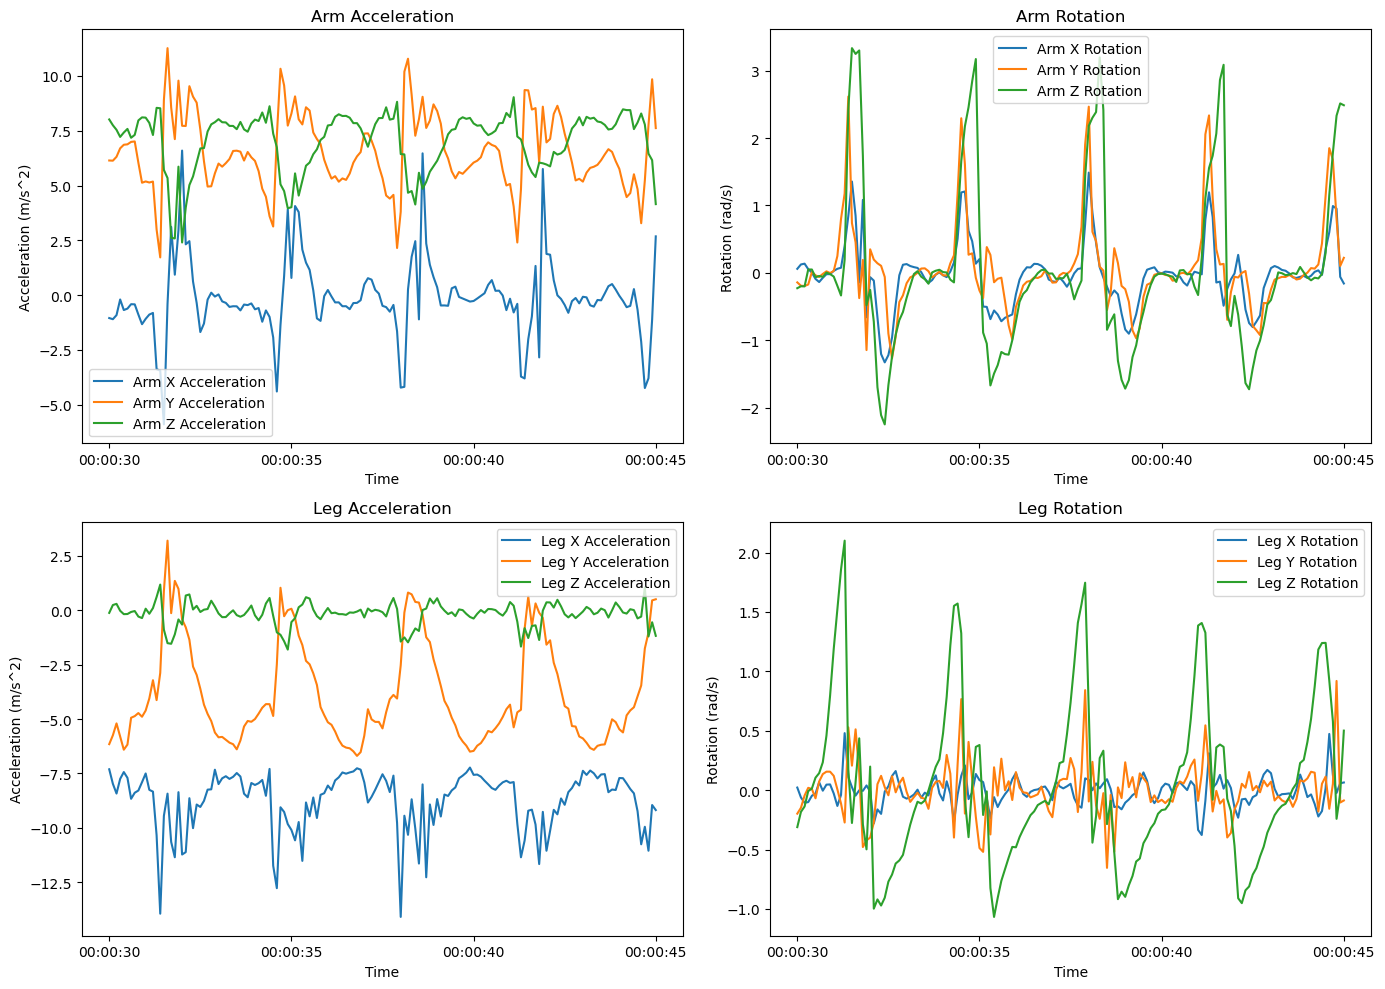

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame

file_path = Path(f'measurement-data/processed/aron/nan_session_1.csv')
data = pd.read_csv(ml4qs_dir / file_path, skipinitialspace=True)

# Convert the 'Time' column to datetime format for easy filtering
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S.%f')

# Filter the data for the time range from 5 to 10 seconds
start_time = pd.to_datetime('00:00:30.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('00:00:45.000', format='%H:%M:%S.%f')
filtered_data = data[(data['Time'] >= start_time) & (data['Time'] <= end_time)]

# Plotting acceleration and rotation for the arm
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Acceleration for the arm
axes[0, 0].plot(filtered_data['Time'], filtered_data['aron_Arm_1_X (m/s^2)'], label='Arm X Acceleration')
axes[0, 0].plot(filtered_data['Time'], filtered_data['aron_Arm_1_Y (m/s^2)'], label='Arm Y Acceleration')
axes[0, 0].plot(filtered_data['Time'], filtered_data['aron_Arm_1_Z (m/s^2)'], label='Arm Z Acceleration')
axes[0, 0].set_title('Arm Acceleration')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Acceleration (m/s^2)')
axes[0, 0].legend()

# Rotation for the arm
axes[0, 1].plot(filtered_data['Time'], filtered_data['aron_Arm_1_X (rad/s)'], label='Arm X Rotation')
axes[0, 1].plot(filtered_data['Time'], filtered_data['aron_Arm_1_Y (rad/s)'], label='Arm Y Rotation')
axes[0, 1].plot(filtered_data['Time'], filtered_data['aron_Arm_1_Z (rad/s)'], label='Arm Z Rotation')
axes[0, 1].set_title('Arm Rotation')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Rotation (rad/s)')
axes[0, 1].legend()

# Acceleration for the leg
axes[1, 0].plot(filtered_data['Time'], filtered_data['aron_Been_1_X (m/s^2)'], label='Leg X Acceleration')
axes[1, 0].plot(filtered_data['Time'], filtered_data['aron_Been_1_Y (m/s^2)'], label='Leg Y Acceleration')
axes[1, 0].plot(filtered_data['Time'], filtered_data['aron_Been_1_Z (m/s^2)'], label='Leg Z Acceleration')
axes[1, 0].set_title('Leg Acceleration')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Acceleration (m/s^2)')
axes[1, 0].legend()

# Rotation for the leg
axes[1, 1].plot(filtered_data['Time'], filtered_data['aron_Been_1_X (rad/s)'], label='Leg X Rotation')
axes[1, 1].plot(filtered_data['Time'], filtered_data['aron_Been_1_Y (rad/s)'], label='Leg Y Rotation')
axes[1, 1].plot(filtered_data['Time'], filtered_data['aron_Been_1_Z (rad/s)'], label='Leg Z Rotation')
axes[1, 1].set_title('Leg Rotation')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Rotation (rad/s)')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


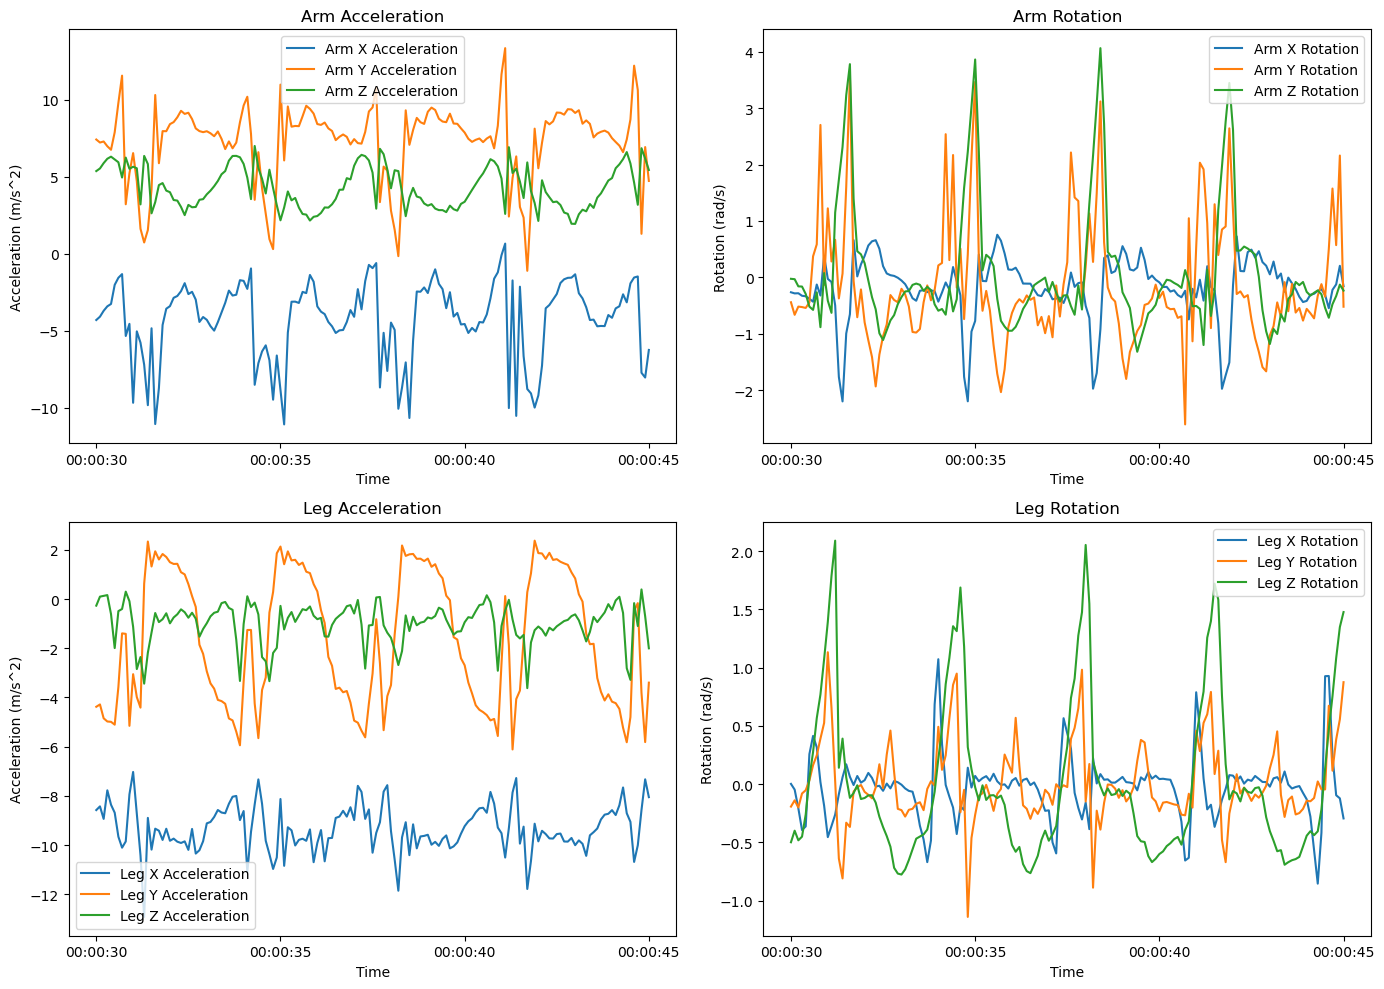

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
name = 'chris'
file_path = Path(f'measurement-data/processed/{name}/nan_session_1.csv')
data = pd.read_csv(ml4qs_dir / file_path, skipinitialspace=True)

# Convert the 'Time' column to datetime format for easy filtering
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S.%f')

# Filter the data for the time range from 5 to 10 seconds
start_time = pd.to_datetime('00:00:30.000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('00:00:45.000', format='%H:%M:%S.%f')
filtered_data = data[(data['Time'] >= start_time) & (data['Time'] <= end_time)]

# Plotting acceleration and rotation for the arm
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Acceleration for the arm
axes[0, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_X (m/s^2)'], label='Arm X Acceleration')
axes[0, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_Y (m/s^2)'], label='Arm Y Acceleration')
axes[0, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_Z (m/s^2)'], label='Arm Z Acceleration')
axes[0, 0].set_title('Arm Acceleration')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Acceleration (m/s^2)')
axes[0, 0].legend()

# Rotation for the arm
axes[0, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_X (rad/s)'], label='Arm X Rotation')
axes[0, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_Y (rad/s)'], label='Arm Y Rotation')
axes[0, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Arm_1_Z (rad/s)'], label='Arm Z Rotation')
axes[0, 1].set_title('Arm Rotation')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Rotation (rad/s)')
axes[0, 1].legend()

# Acceleration for the leg
axes[1, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_X (m/s^2)'], label='Leg X Acceleration')
axes[1, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_Y (m/s^2)'], label='Leg Y Acceleration')
axes[1, 0].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_Z (m/s^2)'], label='Leg Z Acceleration')
axes[1, 0].set_title('Leg Acceleration')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Acceleration (m/s^2)')
axes[1, 0].legend()

# Rotation for the leg
axes[1, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_X (rad/s)'], label='Leg X Rotation')
axes[1, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_Y (rad/s)'], label='Leg Y Rotation')
axes[1, 1].plot(filtered_data['Time'], filtered_data[f'{name}_Been_1_Z (rad/s)'], label='Leg Z Rotation')
axes[1, 1].set_title('Leg Rotation')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Rotation (rad/s)')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

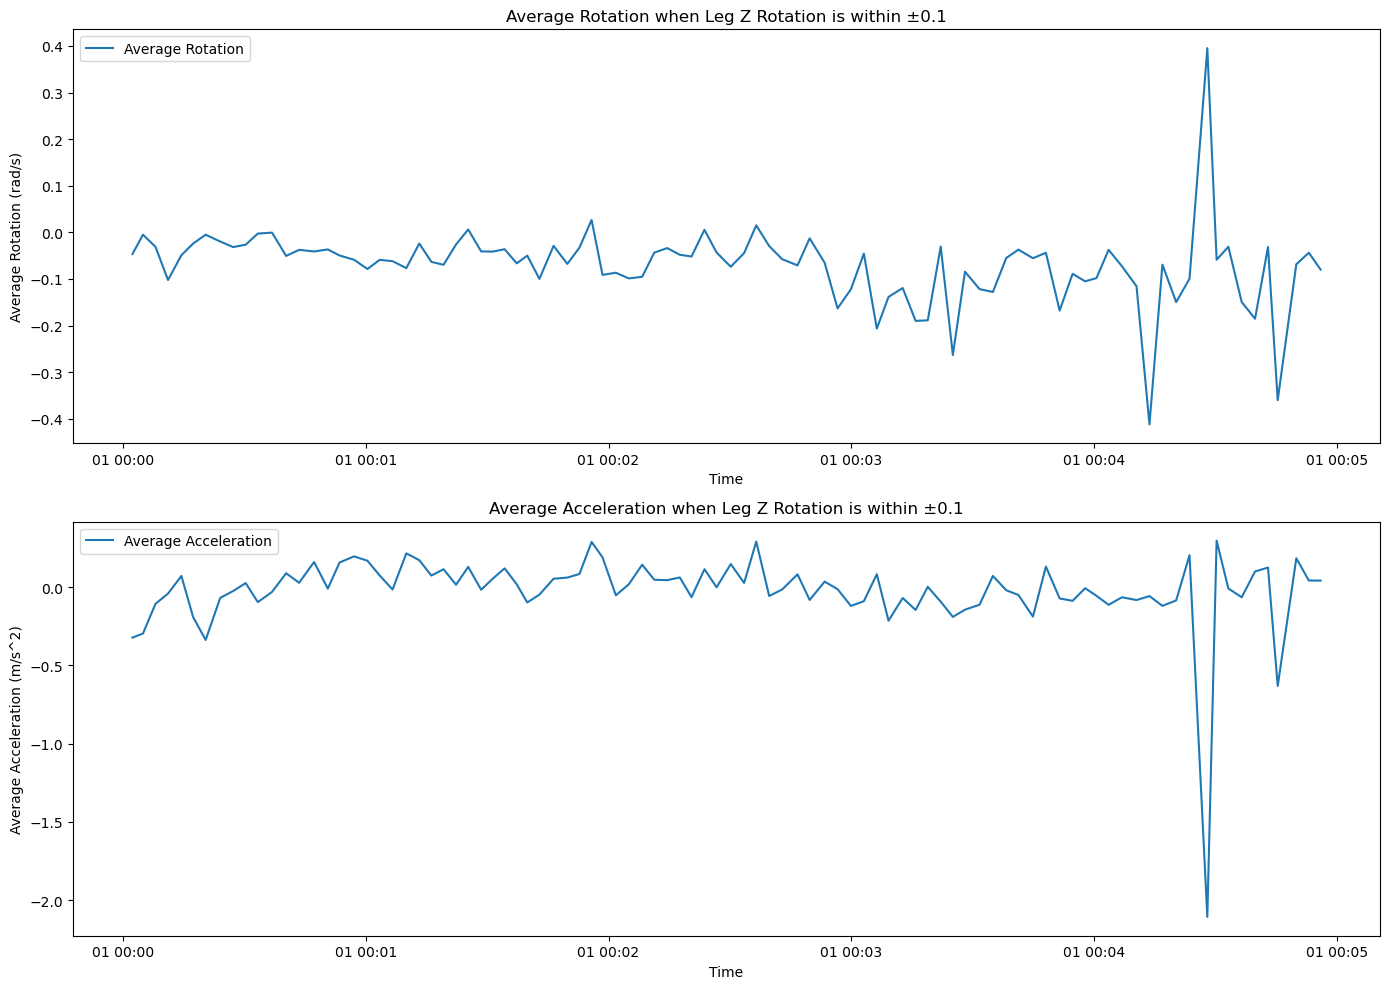

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = Path(f'measurement-data/processed/aron/nan_session_1.csv')
data = pd.read_csv(ml4qs_dir / file_path, skipinitialspace=True)
# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(date + ' ' + data['Time'], format='%Y-%m-%d %H:%M:%S.%f')

# Calculate the time differences
data['Time_diff'] = data['Time'].diff().dt.total_seconds().fillna(0)

# Initialize lists to store the time points and averages
zero_times = []
avg_values = []

# Minimum time difference in seconds
min_time_diff = 2.3

last_time = pd.to_datetime('2024-01-01 00:00:00.000', format='%Y-%m-%d %H:%M:%S.%f')

# Iterate over the data to find the points where leg Z rotation is within ±0.1 and the time difference condition is met
for i in range(1, len(data)):
    current_time = data.loc[i, 'Time']
    if -0.1 <= data.loc[i, 'aron_Been_1_Z (rad/s)'] <= 0.1 and (current_time - last_time).total_seconds() >= min_time_diff:
        zero_times.append(current_time)
        avg_rotation = data.loc[i, ['aron_Arm_1_X (rad/s)', 'aron_Arm_1_Y (rad/s)', 'aron_Arm_1_Z (rad/s)', 'aron_Been_1_X (rad/s)', 'aron_Been_1_Y (rad/s)', 'aron_Been_1_Z (rad/s)']].mean()
        avg_acceleration = data.loc[i, ['aron_Arm_1_X (m/s^2)', 'aron_Arm_1_Y (m/s^2)', 'aron_Arm_1_Z (m/s^2)', 'aron_Been_1_X (m/s^2)', 'aron_Been_1_Y (m/s^2)', 'aron_Been_1_Z (m/s^2)']].mean()
        avg_values.append((avg_rotation, avg_acceleration))
        last_time = current_time

# Convert lists to DataFrame for plotting
avg_df = pd.DataFrame(avg_values, columns=['Avg_Rotation', 'Avg_Acceleration'], index=zero_times)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot average rotation
ax[0].plot(avg_df.index, avg_df['Avg_Rotation'], label='Average Rotation')
ax[0].set_title('Average Rotation when Leg Z Rotation is within ±0.1')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Average Rotation (rad/s)')
ax[0].legend()

# Plot average acceleration
ax[1].plot(avg_df.index, avg_df['Avg_Acceleration'], label='Average Acceleration')
ax[1].set_title('Average Acceleration when Leg Z Rotation is within ±0.1')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Average Acceleration (m/s^2)')
ax[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd
import os
from pathlib import Path

# Define the file path and directory
file_path = Path('measurement-data/full_data.csv')
ml4qs_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data = pd.read_csv(ml4qs_dir / file_path, skipinitialspace=True)

# Convert the time column to datetime
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S.%f')

# Initialize the index
index = 0
newsessionList = []
for id in [1, 21, 13, 2, 23, 3, 11, 12, 22]:
    newsession = data.loc[data['session_id'] == id].copy()
    #print(newsession)
    
    # Calculate the total seconds from the start time
    total_seconds = newsession['time'].dt.hour * 3600 + newsession['time'].dt.minute * 60 + newsession['time'].dt.second + newsession['time'].dt.microsecond / 1e6 + index * 300
    newsession['time'] = total_seconds.apply(lambda x: str(pd.to_timedelta(x, unit='s')).split()[-1])
    newsessionList.append(newsession)
    
    

    
    index += 1  # Increment index for each session

#newsessionList[1].head

combined = pd.concat(newsessionList, ignore_index=True)

combined.head

outputpath = Path(f'measurement-data/full_data_time.csv')
output_file_path = ml4qs_dir / outputpath
combined.to_csv(output_file_path, index=False)

In [67]:
dataset_creators_a[0].data_table

,Aron_Arm_1_X (rad/s),Aron_Arm_1_Y (rad/s),Aron_Arm_1_Z (rad/s),Aron_Arm_1_X (m/s^2),Aron_Arm_1_Y (m/s^2),Aron_Arm_1_Z (m/s^2),Aron_Been_1_X (rad/s),Aron_Been_1_Y (rad/s),Aron_Been_1_Z (rad/s),Aron_Been_1_X (m/s^2),Aron_Been_1_Y (m/s^2),Aron_Been_1_Z (m/s^2),Aron_1_Distance (meters),Aron_1_Pace (seconds),Aron_Arm_1_HR (bpm)
2024-01-01 00:00:00.000,0.028237,0.457469,0.385348,-5.985902,5.196189,4.690780,0.028123,-0.004935,-0.039186,-8.814435,-4.524611,0.085532,1.8,249.0,124.0
2024-01-01 00:00:00.100,0.310956,0.809973,0.833956,-6.878975,5.581084,4.964875,-0.006141,0.036116,-0.057702,-8.661888,-4.490527,0.020088,1.8,249.0,124.0
2024-01-01 00:00:00.200,0.194670,0.671563,1.364319,-5.504553,6.466586,4.441880,-0.006350,0.016911,-0.057184,-8.611068,-4.659570,-0.075159,1.8,249.0,124.0
2024-01-01 00:00:00.300,-0.060951,0.474730,1.318184,-5.113217,7.277506,3.891952,0.003527,-0.014143,-0.042279,-8.796847,-4.583214,-0.223051,1.8,249.0,124.0
2024-01-01 00:00:00.400,-0.169117,0.508552,1.321549,-5.352973,7.744326,3.806569,0.010230,-0.046627,-0.009823,-8.650870,-4.479480,0.003518,1.8,249.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 00:04:59.600,-0.040656,0.118800,-0.388293,1.658356,9.999371,5.219945,0.030514,0.441836,-0.728705,-8.597461,-4.035907,-0.028710,853.3,166.5,188.0
2024-01-01 00:04:59.700,-0.994950,-0.021403,-1.247348,-2.155443,7.488508,9.937385,0.099383,-0.045161,-0.694586,-9.387788,-4.379443,0.102073,853.3,166.5,188.0
2024-01-01 00:04:59.800,-0.309748,-0.237755,-0.178902,0.400148,0.203996,7.139478,0.086480,0.192500,-0.653222,-7.815742,-4.849885,-0.329944,853.3,166.5,188.0
2024-01-01 00:04:59.900,0.544183,1.197160,0.200341,-0.316562,3.964042,8.111332,0.030631,-0.117317,-0.570890,-8.611218,-4.972674,-0.125888,853.3,166.5,188.0


Index(['Time', 'tunde_Arm_1_X (rad/s)', 'tunde_Arm_1_Y (rad/s)',
       'tunde_Arm_1_Z (rad/s)', 'tunde_Arm_1_X (m/s^2)',
       'tunde_Arm_1_Y (m/s^2)', 'tunde_Arm_1_Z (m/s^2)',
       'tunde_Been_1_X (rad/s)', 'tunde_Been_1_Y (rad/s)',
       'tunde_Been_1_Z (rad/s)', 'tunde_Been_1_X (m/s^2)',
       'tunde_Been_1_Y (m/s^2)', 'tunde_Been_1_Z (m/s^2)',
       'tunde_1_Distance (meters)', 'tunde_1_Pace (seconds)',
       'tunde_Arm_1_HR (bpm)'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 640x480 with 0 Axes>

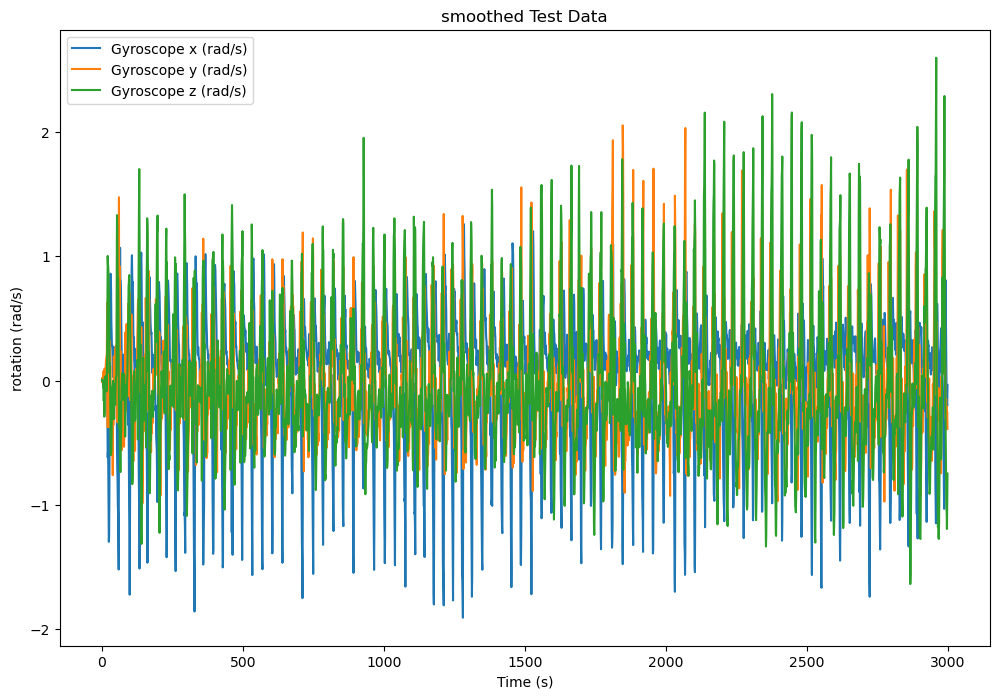

In [75]:
import matplotlib.pyplot as plt

plt.figure()
size = 10
mark = "+"
aggregated_data = dataset_creators_a[0].data_table
plt.figure(figsize=(12,8))
plt.title("smoothed Test Data")
print(aggregated_data.columns)
plt.plot(aggregated_data.index, aggregated_data['tunde_Arm_1_X (rad/s)'], label = 'Gyroscope x (rad/s)')
plt.plot(aggregated_data.index, aggregated_data['tunde_Arm_1_Y (rad/s)'], label = 'Gyroscope y (rad/s)')
plt.plot(aggregated_data.index, aggregated_data['tunde_Arm_1_Z (rad/s)'], label = 'Gyroscope z (rad/s)')
plt.xlabel("Time (s)")
plt.ylabel("rotation (rad/s)")
plt.legend()
plt.show